In [337]:
import pandas as pd

train_csv = pd.read_csv("/storage/k8s/my_kaggle/data_dir/elo-merchant-category-recommendation/train.csv")
test_csv = pd.read_csv("/storage/k8s/my_kaggle/data_dir/elo-merchant-category-recommendation/test.csv")
transaction_csv = pd.read_csv("/storage/k8s/my_kaggle/data_dir/elo-merchant-category-recommendation/historical_transactions.csv")

print(train_csv.shape)
# print(train_csv.describe())
print(train_csv.columns)
print(train_csv.head(1))
print(test_csv.shape)
# print(test_csv.describe())
print(test_csv.columns)

In [326]:
class EDA:
    def __init__(self):
        self.train_count_mounth = pd.DataFrame()
        self.test_count_mounth = pd.DataFrame()
        
        self.train_count_feature1 = pd.DataFrame()
        self.test_count_feature1 = pd.DataFrame()
        
        self.train_count_feature2 = pd.DataFrame()
        self.test_count_feature2 = pd.DataFrame()
        
        self.train_count_feature3 = pd.DataFrame()
        self.test_count_feature3 = pd.DataFrame()
       

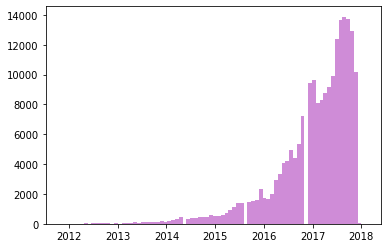

In [196]:
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文(windows)
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

eda_month = pd.DataFrame()

train_csv['first_active_month'] = pd.to_datetime(train_csv['first_active_month'])
eda_month['num'] = train_csv['first_active_month'].unique()

df = train_csv['first_active_month'].value_counts()


import seaborn as sns

plt.hist(train_csv['first_active_month'],bins =80,color="#A01BB1", alpha=.5)

plt.show()


## 數據分佈差異

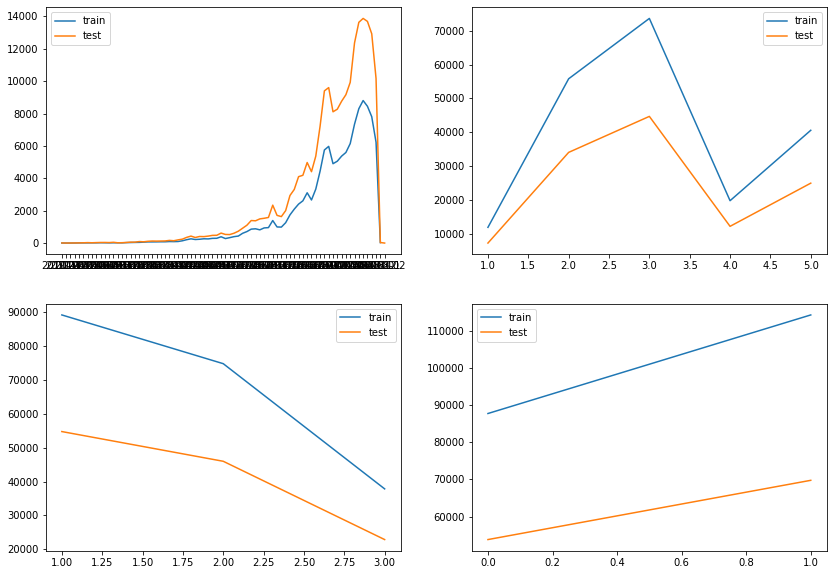

In [331]:
eda = EDA()

df = train_csv.groupby(train_csv['first_active_month']).value_counts()#.to_frame("num")
# print(df)

eda.train_count_mounth = pd.DataFrame()
eda.train_count_mounth['count'] = train_csv.groupby(train_csv['first_active_month']).count()['card_id']
eda.train_count_mounth['first_active_month'] = eda.train_count_mounth.index.to_frame()
eda.train_count_mounth = eda.train_count_mounth.reset_index(drop=True)
eda.train_count_mounth = eda.train_count_mounth[['first_active_month','count']]

eda.test_count_mounth = pd.DataFrame()
eda.test_count_mounth['count'] = test_csv.groupby(test_csv['first_active_month']).count()['card_id']
eda.test_count_mounth['first_active_month'] = eda.test_count_mounth.index.to_frame()
eda.test_count_mounth = eda.test_count_mounth.reset_index(drop=True)
eda.test_count_mounth = eda.test_count_mounth[['first_active_month','count']]

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
line1, = plt.plot(eda.test_count_mounth['first_active_month'],eda.test_count_mounth['count'])
line2, = plt.plot(eda.train_count_mounth['first_active_month'],eda.train_count_mounth['count'])

plt.legend((line1,line2),['train','test'])

plt.subplot(2,2,2)

eda.train_count_feature1 = pd.DataFrame()
eda.train_count_feature1['count'] = train_csv.groupby(train_csv['feature_1']).count()['card_id']
eda.train_count_feature1['feature_1'] = eda.train_count_feature1.index.to_frame()
eda.train_count_feature1 = eda.train_count_feature1.reset_index(drop=True)
eda.train_count_feature1 = eda.train_count_feature1[['feature_1','count']]

eda.test_count_feature1 = pd.DataFrame()
eda.test_count_feature1['count'] = test_csv.groupby(test_csv['feature_1']).count()['card_id']
eda.test_count_feature1['feature_1'] = eda.test_count_feature1.index.to_frame()
eda.test_count_feature1 = eda.test_count_feature1.reset_index(drop=True)
eda.test_count_feature1 = eda.test_count_feature1[['feature_1','count']]

line1, = plt.plot(eda.train_count_feature1['feature_1'],eda.train_count_feature1['count'])
line2, = plt.plot(eda.test_count_feature1['feature_1'],eda.test_count_feature1['count'])
plt.legend((line1,line2),['train','test'])

plt.subplot(2,2,3)

eda.train_count_feature2['count'] = train_csv.groupby(train_csv['feature_2']).count()['card_id']
eda.train_count_feature2['feature_2'] = eda.train_count_feature2.index.to_frame()
eda.train_count_feature2 = eda.train_count_feature2.reset_index(drop=True)
eda.train_count_feature2 = eda.train_count_feature2[['feature_2','count']]

eda.test_count_feature2['count'] = test_csv.groupby(test_csv['feature_2']).count()['card_id']
eda.test_count_feature2['feature_2'] = eda.test_count_feature2.index.to_frame()
eda.test_count_feature2 = eda.test_count_feature2.reset_index(drop=True)
eda.test_count_feature2 = eda.test_count_feature2[['feature_2','count']]
line1, = plt.plot(eda.train_count_feature2['feature_2'],eda.train_count_feature2['count'])
line2, = plt.plot(eda.test_count_feature2['feature_2'],eda.test_count_feature2['count'])

plt.legend((line1,line2),['train','test'])

plt.subplot(2,2,4)

eda.train_count_feature3['count'] = train_csv.groupby(train_csv['feature_3']).count()['card_id']
eda.train_count_feature3['feature_3'] = eda.train_count_feature3.index.to_frame()
eda.train_count_feature3 = eda.train_count_feature3.reset_index(drop=True)
eda.train_count_feature3 = eda.train_count_feature3[['feature_3','count']]

eda.test_count_feature3['count'] = test_csv.groupby(test_csv['feature_3']).count()['card_id']
eda.test_count_feature3['feature_3'] = eda.test_count_feature3.index.to_frame()
eda.test_count_feature3 = eda.test_count_feature3.reset_index(drop=True)
eda.test_count_feature3 = eda.test_count_feature3[['feature_3','count']]
line1, = plt.plot(eda.train_count_feature3['feature_3'],eda.train_count_feature3['count'])
line3, = plt.plot(eda.test_count_feature3['feature_3'],eda.test_count_feature3['count'])
plt.legend((line1,line2),['train','test'])

plt.show()

In [336]:
features = {}
card_all = train_csv['card_id'].append(test_csv['card_id']).values.tolist()
for card in card_all:
    features[card]={}
col

['C_ID_92a2005557', 'C_ID_3d0044924f', 'C_ID_d639edf6cd', 'C_ID_186d6a6901', 'C_ID_cdbd2c0db2', 'C_ID_0894217f2f', 'C_ID_7e63323c00', 'C_ID_dfa21fc124', 'C_ID_fe0fdac8ea', 'C_ID_bf62c0b49d', 'C_ID_92853cdb2c', 'C_ID_269d816788', 'C_ID_61d50d7057', 'C_ID_4e07413433', 'C_ID_b6302b31c6', 'C_ID_3b69154173', 'C_ID_9feec11e78', 'C_ID_f6658dbefe', 'C_ID_4a7dda0f9e', 'C_ID_6adae2a906', 'C_ID_0b70ca7347', 'C_ID_25b2509282', 'C_ID_82fb11db22', 'C_ID_e03db05bde', 'C_ID_dcb7c76747', 'C_ID_749cfc0c3a', 'C_ID_4a97126360', 'C_ID_17dea8d446', 'C_ID_fcef0dfd67', 'C_ID_82868156f0', 'C_ID_8fa2ad405d', 'C_ID_ee82cdf108', 'C_ID_22ca4a5cdc', 'C_ID_7130fd2b3d', 'C_ID_3140b5e572', 'C_ID_022b48f3ac', 'C_ID_0fb5eebcbb', 'C_ID_38a4be198d', 'C_ID_8ffb6daff8', 'C_ID_5967df7a42', 'C_ID_c8cd0080cb', 'C_ID_69e95a3ec9', 'C_ID_994d1ce39d', 'C_ID_1919f9080e', 'C_ID_c9fc613553', 'C_ID_bff4607e58', 'C_ID_f478df16fd', 'C_ID_69350a7ab6', 'C_ID_6c3cd81c4c', 'C_ID_f2e927e5da', 'C_ID_3681e149f7', 'C_ID_4673dd0b7b', 'C_ID_092d9

/tmp/ipykernel_3161275/2009822550.py:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

